# Stochastische Variabelen Genereren
In het onderstaande Jupyter-verslag zal een standaard normaalverdeling worden gegenereerd door middel van uniform verdeelde psuedo-random getallen.

In [1]:
import scripts.RandomNumberGenerator as RNG
from scipy.special import ndtri
from scipy.stats import normaltest
import seaborn as sns

Het aanmaken van een seed waarop de pseudo-random getallen worden gebaseerd.

In [2]:
seed = RNG.generate_seed()
seed

18865656852722168

10.000 pseudo-random getallen genereren met de zojuist gegenereerde seed.

In [3]:
data = RNG.generator_endsquare(samples=10_000, seed=seed, show_seed=False)
print(data)

[0.0985073  0.86127432 0.06374827 ... 0.94541797 0.07292729 0.71848819]


Om een uniforme naar een normaalverdeling om te zetten dient van ieder getal de inverse van het CDF worden te berekend.

[Inversse Transform Sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling)


[Inverse van CDF in Python](https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p)

In [4]:
inverse_cdf = ndtri(data)
inverse_cdf

array([-1.29010387,  1.08606246, -1.52404875, ...,  1.60196175,
       -1.45433093,  0.57835624])

Alle 10.000 waardes worden vervolgens geplot. De normaalverdeling hieronder is een standaard normaalverdeling. Deze heeft een $\mu$ van $0$ en een $\sigma$ van $1$. Tussen $-3$ en $3$ standaarddeviaties zullen zich dus >99% van de waardes bevinden.

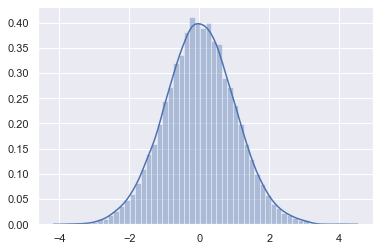

In [5]:
sns.set(context="notebook")
sns.distplot(inverse_cdf)

Om te testen of wat lijkt op een standaard normaalverdeling ook daadwerkelijk een standaard normaalverdeling is, moet dit worden getoetst. Dit wordt gedaan door middel van een hypothesetoets met de volgende twee hypotheses:

H0: De verdeling is standaard normaalverdeeld  
H1: De verdeling is niet standaard normaalverdeeld

In [6]:
_, p = normaltest(inverse_cdf)
alpha = 0.05

print(f"p = {p:.6f}")

if p < alpha:
    print("H0 kan worden verworpen, H1 wordt aanvaard.")
else:
    print("H0 kan niet worden verworpen, we blijven sceptisch.")

p = 0.701050
H0 kan niet worden verworpen, we blijven sceptisch.
